In [1]:
!pip install yfinance --upgrade
!pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 154.2 kB/s eta 0:00:00 0:00:01
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.21
    Uninstalling yfinance-0.2.21:
      Successfully uninstalled yfinance-0.2.21
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB ? eta 0:00:000:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 132.5 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 103.7 kB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.9/642.9 kB 1.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 258.0 kB/s eta 0:00:00:0100:01m
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 331.6 kB/s eta 0:00:000:0100:01
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732001 sha256=2120d443fbd6cbf1488e9875703ebe5b95c2f3fe423c5672a72393f7bf8dcee2
  Stored in directory: /Users/m

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf
import prophet as prophet

### MSFT

In [3]:
myticker = 'MSFT'
mydata = pd.DataFrame()
mydata[myticker] = yf.download(myticker, start="2020-01-01",end="2021-12-31")['Adj Close']
mydata.columns = {'Close Price'}
mydata.head(10)

[*********************100%***********************]  1 of 1 completed


,Close Price
Date,
2020-01-02,155.422028
2020-01-03,153.486755
2020-01-06,153.883514
2020-01-07,152.480423
2020-01-08,154.909180
2020-01-09,156.844452
2020-01-10,156.118759
2020-01-13,157.995956
2020-01-14,156.883163


In [4]:
mydata=mydata.reset_index()
mydata[['ds','y']]= mydata[['Date','Close Price']]
mydata

,Date,Close Price,ds,y
0,2020-01-02,155.422028,2020-01-02,155.422028
1,2020-01-03,153.486755,2020-01-03,153.486755
2,2020-01-06,153.883514,2020-01-06,153.883514
3,2020-01-07,152.480423,2020-01-07,152.480423
4,2020-01-08,154.909180,2020-01-08,154.909180
...,...,...,...,...
499,2021-12-23,330.033112,2021-12-23,330.033112
500,2021-12-27,337.685150,2021-12-27,337.685150
501,2021-12-28,336.501801,2021-12-28,336.501801
502,2021-12-29,337.192078,2021-12-29,337.192078


In [5]:
model=prophet.Prophet()
prophet_mydata=mydata.drop(['Date','Close Price'], axis=1)

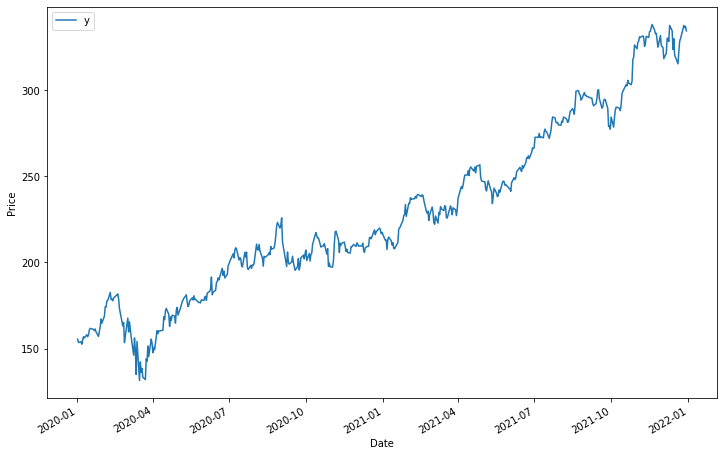

In [6]:
ax = prophet_mydata.set_index('ds').plot(figsize=(12,8))
ax.set_ylabel('Price')
ax.set_xlabel('Date')
plt.show()

In [7]:
model.fit(prophet_mydata)

17:18:56 - cmdstanpy - INFO - Chain [1] start processing
17:19:03 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
future=model.make_future_dataframe(periods=250)

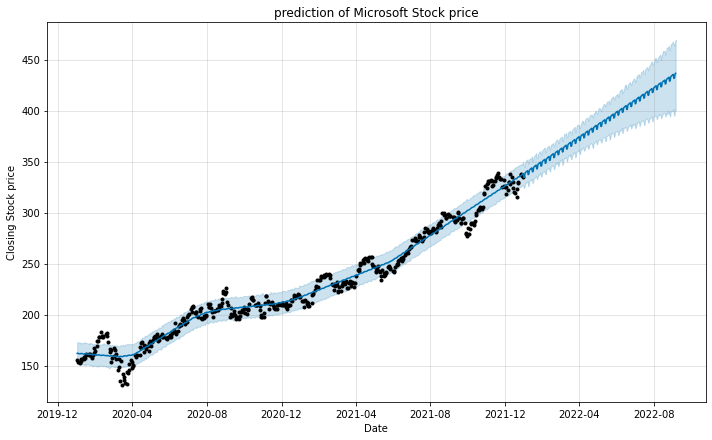

,ds,yhat,yhat_lower,yhat_upper
749,2022-09-02,435.428916,401.561670,466.544922
750,2022-09-03,431.549063,396.517429,464.964830
751,2022-09-04,431.945594,394.877005,463.551302
752,2022-09-05,435.976569,400.834753,466.991050
753,2022-09-06,436.556440,399.868156,469.534799


In [9]:
predictions=model.predict(future)
model.plot(predictions)
plt.title("prediction of Microsoft Stock price")
plt.xlabel("Date")
plt.ylabel("Closing Stock price")
plt.show()
predictions[['ds','yhat','yhat_lower','yhat_upper']].tail()


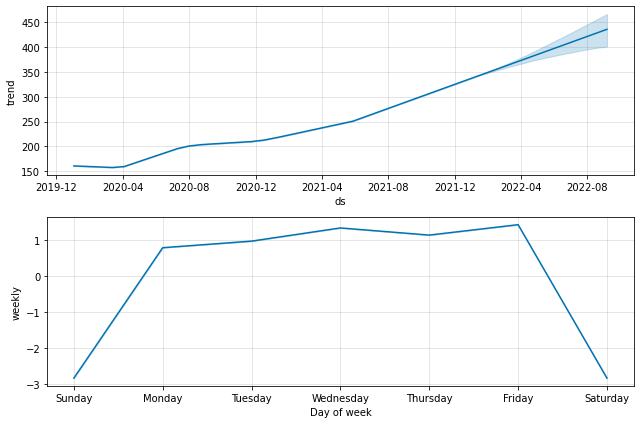

In [10]:
model.plot_components(predictions)
plt.show()

### KO

In [11]:
myticker1 = 'KO'
mydata1 = pd.DataFrame()
mydata1[myticker] = yf.download(myticker1, start="2020-01-01",end="2021-12-31")['Adj Close']
mydata1.columns = {'Close Price'}
mydata1.head(10)

[*********************100%***********************]  1 of 1 completed


,Close Price
Date,
2020-01-02,49.307655
2020-01-03,49.038654
2020-01-06,49.020718
2020-01-07,48.644123
2020-01-08,48.733780
2020-01-09,49.621487
2020-01-10,49.791851
2020-01-13,50.329857
2020-01-14,50.213284


In [12]:
mydata1=mydata1.reset_index()
mydata1[['ds','y']]= mydata1[['Date','Close Price']]
mydata1

,Date,Close Price,ds,y
0,2020-01-02,49.307655,2020-01-02,49.307655
1,2020-01-03,49.038654,2020-01-03,49.038654
2,2020-01-06,49.020718,2020-01-06,49.020718
3,2020-01-07,48.644123,2020-01-07,48.644123
4,2020-01-08,48.733780,2020-01-08,48.733780
...,...,...,...,...
499,2021-12-23,55.692444,2021-12-23,55.692444
500,2021-12-27,56.103775,2021-12-27,56.103775
501,2021-12-28,56.323795,2021-12-28,56.323795
502,2021-12-29,56.390751,2021-12-29,56.390751


In [13]:
model1=prophet.Prophet()
prophet_mydata1=mydata1.drop(['Date','Close Price'], axis=1)

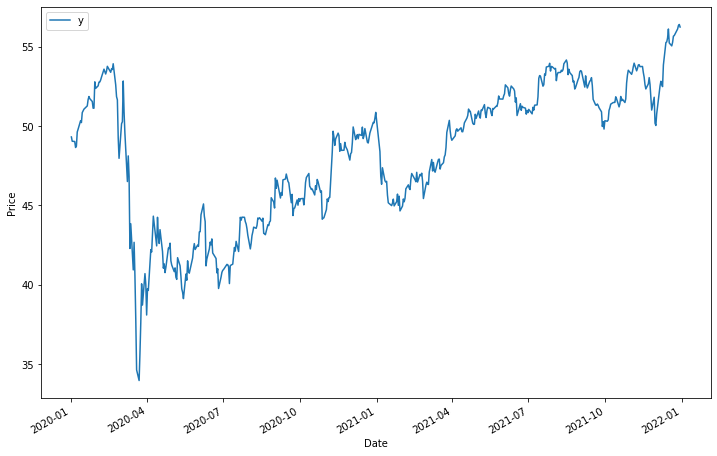

In [14]:
ax1 = prophet_mydata1.set_index('ds').plot(figsize=(12,8))
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
plt.show()

In [15]:
model1.fit(prophet_mydata1)

17:19:07 - cmdstanpy - INFO - Chain [1] start processing
17:19:07 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
future1=model1.make_future_dataframe(periods=250)

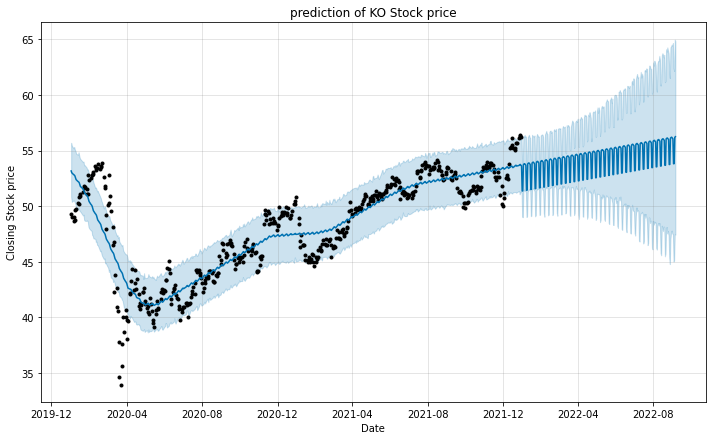

,ds,yhat,yhat_lower,yhat_upper
749,2022-09-02,56.056539,47.499611,64.660475
750,2022-09-03,53.813638,45.016099,62.407943
751,2022-09-04,53.823632,45.120440,62.161768
752,2022-09-05,56.182099,47.482189,64.967373
753,2022-09-06,56.247636,47.443087,64.829897


In [17]:
predictions1=model1.predict(future1)
model1.plot(predictions1)
plt.title("prediction of KO Stock price")
plt.xlabel("Date")
plt.ylabel("Closing Stock price")
plt.show()
predictions1[['ds','yhat','yhat_lower','yhat_upper']].tail()

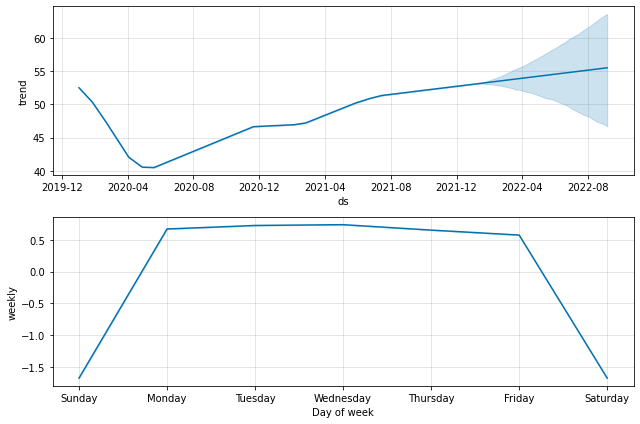

In [18]:
model1.plot_components(predictions1)
plt.show()
